In [63]:
# single-label, multiclass classification
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [56]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [57]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [58]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in
                            train_data[0]])

557056/550378 [==============================] - 27s 48us/step


In [61]:
train_labels[10]

3

In [60]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [64]:
# Encoding the data
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [65]:
# Model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [66]:
# Compiling the model

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [67]:
# Setting asside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [71]:
# Training the model

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 258us/step - loss: 2.5240 - acc: 0.4976 - val_loss: 1.7178 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 164us/step - loss: 1.4438 - acc: 0.6888 - val_loss: 1.3490 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 160us/step - loss: 1.0975 - acc: 0.7648 - val_loss: 1.1734 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.8712 - acc: 0.8168 - val_loss: 1.0791 - val_acc: 0.7610
Epoch 5/20
7982/7982 [==============================] - 2s 195us/step - loss: 0.7047 - acc: 0.8487 - val_loss: 0.9855 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 196us/step - loss: 0.5665 - acc: 0.8800 - val_loss: 0.9417 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.4586 - acc: 0.9049 - val_loss: 0.9076 - val_acc: 0.8020


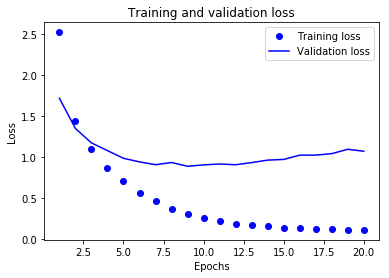

In [73]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

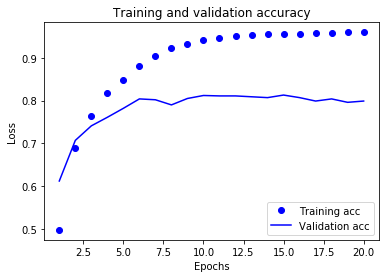

In [74]:
# Plotting the training and validation accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [76]:
# As overfitting occurs after the 9th epoch, we retrain the model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 209us/step - loss: 2.5397 - acc: 0.5224 - val_loss: 1.6743 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 160us/step - loss: 1.3723 - acc: 0.7117 - val_loss: 1.2759 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 2s 192us/step - loss: 1.0144 - acc: 0.7784 - val_loss: 1.1301 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 159us/step - loss: 0.7982 - acc: 0.8246 - val_loss: 1.0538 - val_acc: 0.7630
Epoch 5/9
7982/7982 [==============================] - 1s 162us/step - loss: 0.6396 - acc: 0.8622 - val_loss: 0.9761 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 194us/step - loss: 0.5119 - acc: 0.8918 - val_loss: 0.9093 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 187us/step - loss: 0.4111 - acc: 0.9152 - val_loss: 0.8933 - val_acc: 0.8210
Epoch 8

In [77]:
results

[1.0239472811708255, 0.7756010686194165]

In [78]:
# Comparing to random baseline

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [79]:
# Generating predictions for new data

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [80]:
np.sum(predictions[0])

1.0

In [81]:
np.argmax(predictions[0])

3

In [ ]:
# With integer tensor encoding, we use sparse_categorical_Crossentropy as loss function

